# Analisis de telecom proyecto hackaton

Se decidio que se utilizara el data set de la pagina de   del siguiente enlace
<a href="https://www.kaggle.com/datasets/jpacse/datasets-for-churn-telecom?resource=download&select=cell2celltrain.csv"><font color="skyblue">kaggle-telecom (cell2cell)</font></a>

Utilizando principalmente el dataset con el nombre <a href="https://github.com/Kevincancino26/Versionado-de-Data-Science-telecom-cell2cell-hackaton/blob/main/cell2celltrain.csv"><font color="skyblue"> **cell2celltrain.csv** </font></a>deribado a que esta contien mas datos relevantes para el analisis de correlacion y entrenamiento de ML necesario para el proyecto.

<font color ='green'>Nota: </font>como la mayoria a tenido problemas al descargar el data set, pueden darle click en el nombre de este lo podran descargar directo o darle al nombre de la pagina y descargarlo directo de la fuente

<font color='pink'> IMPORTANTE

<font color='pink'> Este es el primer versionado por ende podemos trabajar en una copia de este archivo asi en nuestro equipos o en nuestros propios entornos de colab para asi comparar tanto limpieza y otros modelos en las formas que tenemos de programar y tener un codigo mas limpio al presentarle a nuestros compañeros de back end

"como propuesto usemos el versionado de github para ir contruyendo historial de modificaciones puntuales de las lineas que pasen nuestro filtro grupo, por el momento hare el versionado en mi repositorio en lo que surge el git propio del proyecto"</font>












# Los pasos a realizar acordados en la reunion son:





*   Limpieza de datos:


1.   Verificacion de datos nulos y eliminacion

2.   Verificacion del tipo de dato sea el indicado para la columna y funciona para el analisis.. en caso necesario tratamiento de datos.

3.  Cambio de nombre a las columnas de ingles a español para facil lectura

4. En caso que sea necesario en los buleanos puede cambiar No=0 y Si=1 siguiendo la logica de computacion con buleanos(solo si se considera necesario)

<font color='red'> Nota:  Estos pasos son los mismos que hizimos en nuestro proyecto Telecom X parte 1, igual mente preguntar a los compañeros por dudas en estos pasos</font>






#Bibliotecas importadas o intaladas

In [3]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de dataset

<font color='skyblue'>Nota para el equipo (se elimina del versionado final):Una contribucion pequeña para agilisacion si en un futuro tiene problemas con los encodings de archivos csv, pueden utilizar esta funcion que decifra el encoding y leer el dataset</font>

In [4]:
# Funcion de lectura de archivo CSV

def leer(file_path, encodings=None, separadores=None):
    if encodings is None:
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
    if separadores is None:
        separadores = [',', ';', '\t', '|']

    #combinaciones de iteracion donde se ejecutan las diferentes convinaciones de los caracteres de la listas
    combinaciones=list(itertools.product(encodings,separadores))


    #Con diferentes encodings y separadores
    for encoding in encodings:
        for sep in separadores:
            try:
                df=pd.read_csv(file_path,
                encoding=encoding,
                sep=sep,
                on_bad_lines='skip',
                engine='python')# motor de lectura de csv en python para archivos complejos en lugar de usar el por defecto de C

                 # Verificamos que se leyó
                if not df.empty and len(df.columns) > 1:# si no esta vacio y hay mas de una columna, deribado que por el encodign los datos pueden aparecer en un solo registro
                    print(f" Se leyo con exito el dataset con el encoding: {encoding} y uso como separador: '{sep}'")
                    return df
            except UnicodeDecodeError:
                continue
            try:
                df = pd.read_csv(file_path, on_bad_lines='skip')#en caso de que no contenfa un separador y un encodign
                print("Leido con exito sin encoding")
                return df
            except UnicodeDecodeError:
                print('No sse puede leer el archivo con ninguna combinacion ')

<font color='skyblue'>Nota para el equipo (se elimina del versionado final): si llegan a tener una mejor manera o una idea de como mejorar el codigo anterior se los agradeceria que compartieramos mutuamente majorar </font>

In [5]:
print('')
df2=leer('https://raw.githubusercontent.com/AMG-AA/churn-insight_Hackathon-Alura/refs/heads/main/Dataset%20telecom%20(cell2cell)/cell2celltrain.csv')
print('')
df2


 Se leyo con exito el dataset con el encoding: utf-8 y uso como separador: ','



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


# Informacion del df2

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# Limpieza de datos

## Traduccion de columnas

<font color='skyblue'>Nota para el equipo (se elimina del versionado final):Lista de las columnas para descargar y traducir ( se dispone en un archivo descargable de texto para copiar mas facil al momento de traducir)</font>

In [7]:

#utilizando with open para la creacion de un archivo tipo txt
lista_de_columnas=df2.columns.tolist()
with open('Lista de las columnas.txt','w',encoding='utf-8') as f:

  for i,item in enumerate(lista_de_columnas,1):# escribe en listado linea por lenea, numerandolas con un ciclo for con funcion de numeracion desde el 1

    f.write(f"{i}.{item}\n")#creacion de archivo de texto
    print(f"{i}.{item}")#imprime en pantalla



1.CustomerID
2.Churn
3.MonthlyRevenue
4.MonthlyMinutes
5.TotalRecurringCharge
6.DirectorAssistedCalls
7.OverageMinutes
8.RoamingCalls
9.PercChangeMinutes
10.PercChangeRevenues
11.DroppedCalls
12.BlockedCalls
13.UnansweredCalls
14.CustomerCareCalls
15.ThreewayCalls
16.ReceivedCalls
17.OutboundCalls
18.InboundCalls
19.PeakCallsInOut
20.OffPeakCallsInOut
21.DroppedBlockedCalls
22.CallForwardingCalls
23.CallWaitingCalls
24.MonthsInService
25.UniqueSubs
26.ActiveSubs
27.ServiceArea
28.Handsets
29.HandsetModels
30.CurrentEquipmentDays
31.AgeHH1
32.AgeHH2
33.ChildrenInHH
34.HandsetRefurbished
35.HandsetWebCapable
36.TruckOwner
37.RVOwner
38.Homeownership
39.BuysViaMailOrder
40.RespondsToMailOffers
41.OptOutMailings
42.NonUSTravel
43.OwnsComputer
44.HasCreditCard
45.RetentionCalls
46.RetentionOffersAccepted
47.NewCellphoneUser
48.NotNewCellphoneUser
49.ReferralsMadeBySubscriber
50.IncomeGroup
51.OwnsMotorcycle
52.AdjustmentsToCreditRating
53.HandsetPrice
54.MadeCallToRetentionTeam
55.CreditRat

In [8]:
# Use gemini para traducir y me ayude a crear el proceso uno por uno

# Diccionario de mapeo: 'NombreOriginal': 'NombreNuevo'
columnas_español = {
    'CustomerID': 'ID_Cliente',
    'Churn': 'Churn',
    'MonthlyRevenue': 'Ingresos_Mensuales',
    'MonthlyMinutes': 'Minutos_Mensuales',
    'TotalRecurringCharge': 'Cargo_Recurrente_Total',
    'DirectorAssistedCalls': 'Llamadas_Asistidas_Directorio',
    'OverageMinutes': 'Minutos_Excedentes',
    'RoamingCalls': 'Llamadas_Roaming',
    'PercChangeMinutes': 'Cambio_Perc_Minutos',
    'PercChangeRevenues': 'Cambio_Perc_Ingresos',
    'DroppedCalls': 'Llamadas_Caidas',
    'BlockedCalls': 'Llamadas_Bloqueadas',
    'UnansweredCalls': 'Llamadas_No_Contestadas',
    'CustomerCareCalls': 'Llamadas_Atencion_Cliente',
    'ThreewayCalls': 'Llamadas_Tripartitas',
    'ReceivedCalls': 'Llamadas_Recibidas',
    'OutboundCalls': 'Llamadas_Salientes',
    'InboundCalls': 'Llamadas_Entrantes',
    'PeakCallsInOut': 'Llamadas_Pico_Ent_Sal',
    'OffPeakCallsInOut': 'Llamadas_FueraPico_Ent_Sal',
    'DroppedBlockedCalls': 'Llamadas_Caidas_Bloqueadas',
    'CallForwardingCalls': 'Llamadas_Desvío',
    'CallWaitingCalls': 'Llamadas_Espera',
    'MonthsInService': 'Meses_en_Servicio',
    'UniqueSubs': 'Suscriptores_Unicos',
    'ActiveSubs': 'Suscriptores_Activos',
    'ServiceArea': 'Area_Servicio',
    'Handsets': 'Equipos_Totales',
    'HandsetModels': 'Modelos_quEipos',
    'CurrentEquipmentDays': 'Dias_Equipo_Actual',
    'AgeHH1': 'Edad_Hogar_1',
    'AgeHH2': 'Edad_Hogar_2',
    'ChildrenInHH': 'Hijos_en_Hogar',
    'HandsetRefurbished': 'Equipo_Reacondicionado',
    'HandsetWebCapable': 'Equipo_Capacidad_Web',
    'TruckOwner': 'Propietario_Camioneta',
    'RVOwner': 'Propietario_RV',
    'Homeownership': 'Propiedad_Vivienda',
    'BuysViaMailOrder': 'Compra_Correo',
    'RespondsToMailOffers': 'Responde_Ofertas_Correo',
    'OptOutMailings': 'Baja_Publicidad_Correo',
    'NonUSTravel': 'Viajes_Fuera_EEUU',
    'OwnsComputer': 'Posee_Computadora',
    'HasCreditCard': 'Tiene_Tarjeta_Credito',
    'RetentionCalls': 'Llamadas_Retencion',
    'RetentionOffersAccepted': 'Ofertas_Retencion_Aceptadas',
    'NewCellphoneUser': 'Nuevo_Usuario_Celular',
    'NotNewCellphoneUser': 'No_Nuevo_Usuario_Celular',
    'ReferralsMadeBySubscriber': 'Referidos_Hechos',
    'IncomeGroup': 'Grupo_Ingresos',
    'OwnsMotorcycle': 'Posee_Motocicleta',
    'AdjustmentsToCreditRating': 'Ajustes_Calificacion_Credito',
    'HandsetPrice': 'Precio_Equipo',
    'MadeCallToRetentionTeam': 'Llamo_Equipo_Retencion',
    'CreditRating': 'Calificacion_Credito',
    'PrizmCode': 'Codigo_Prizm',
    'Occupation': 'Ocupacion',
    'MaritalStatus': 'Estado_Civil'
}

# Creo una copia primero del directorio

df3 = df2.copy()

# Se aplica el renombramiento
df3 = df3.rename(columns=columnas_español)

# Verifica los cambios
print(df3.columns)

Index(['ID_Cliente', 'Churn', 'Ingresos_Mensuales', 'Minutos_Mensuales',
       'Cargo_Recurrente_Total', 'Llamadas_Asistidas_Directorio',
       'Minutos_Excedentes', 'Llamadas_Roaming', 'Cambio_Perc_Minutos',
       'Cambio_Perc_Ingresos', 'Llamadas_Caidas', 'Llamadas_Bloqueadas',
       'Llamadas_No_Contestadas', 'Llamadas_Atencion_Cliente',
       'Llamadas_Tripartitas', 'Llamadas_Recibidas', 'Llamadas_Salientes',
       'Llamadas_Entrantes', 'Llamadas_Pico_Ent_Sal',
       'Llamadas_FueraPico_Ent_Sal', 'Llamadas_Caidas_Bloqueadas',
       'Llamadas_Desvío', 'Llamadas_Espera', 'Meses_en_Servicio',
       'Suscriptores_Unicos', 'Suscriptores_Activos', 'Area_Servicio',
       'Equipos_Totales', 'Modelos_quEipos', 'Dias_Equipo_Actual',
       'Edad_Hogar_1', 'Edad_Hogar_2', 'Hijos_en_Hogar',
       'Equipo_Reacondicionado', 'Equipo_Capacidad_Web',
       'Propietario_Camioneta', 'Propietario_RV', 'Propiedad_Vivienda',
       'Compra_Correo', 'Responde_Ofertas_Correo', 'Baja_Publicidad

##Dataframe copia si tratar

In [9]:
df4=df3.copy()
df4

,ID_Cliente,Churn,Ingresos_Mensuales,Minutos_Mensuales,Cargo_Recurrente_Total,Llamadas_Asistidas_Directorio,Minutos_Excedentes,Llamadas_Roaming,Cambio_Perc_Minutos,Cambio_Perc_Ingresos,...,Referidos_Hechos,Grupo_Ingresos,Posee_Motocicleta,Ajustes_Calificacion_Credito,Precio_Equipo,Llamo_Equipo_Retencion,Calificacion_Credito,Codigo_Prizm,Ocupacion,Estado_Civil
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


## Columnas con conteo de nulos

### Tabla de conteo de nulos con procentaje en el dataset


In [10]:
# Se crea un resumen deribado de la sumatoria de los sigueintes caracteres determinados

resumen=pd.DataFrame({ 'Nulos (NaN)': df3.isna().sum()})

resumen['Tipo'] = df3.dtypes #se agrega el tipo de dato de cada columna

resumen['porcentaje']=(resumen['Nulos (NaN)']/51047)*100 #porcentaje de acuerdo a la cantidad total de datos

porcentaje_total=resumen['porcentaje'].sum()

# Se filtra para mostrar solo las columnas que tienen al menos uno de estos valores no cero en las columnas de conteo
columnas_conteo = ['Nulos (NaN)']#se guarda el conteo

# se filtra las columnas que solo corresponden al coteo realizado fila por fila
resumen_filtrado1 = resumen[(resumen[columnas_conteo]).any(axis=1)]

print('Lista de Nulos \n')
print(f'porcentaje totalde nulos: {porcentaje_total.round(2)}%\n')
print(resumen_filtrado1)


Lista de Nulos 

porcentaje totalde nulos: 6.89%

                               Nulos (NaN)     Tipo  porcentaje
Ingresos_Mensuales                     156  float64    0.305601
Minutos_Mensuales                      156  float64    0.305601
Cargo_Recurrente_Total                 156  float64    0.305601
Llamadas_Asistidas_Directorio          156  float64    0.305601
Minutos_Excedentes                     156  float64    0.305601
Llamadas_Roaming                       156  float64    0.305601
Cambio_Perc_Minutos                    367  float64    0.718945
Cambio_Perc_Ingresos                   367  float64    0.718945
Area_Servicio                           24   object    0.047015
Equipos_Totales                          1  float64    0.001959
Modelos_quEipos                          1  float64    0.001959
Dias_Equipo_Actual                       1  float64    0.001959
Edad_Hogar_1                           909  float64    1.780712
Edad_Hogar_2                           909  float64   

### tabla de conteo de buleanos

In [11]:
# Se crea un resumen deribado de la sumatoria de los sigueintes caracteres determinados
resumen2 = pd.DataFrame({
    'Yes': (df3  == 'Yes').sum(),
    'No': (df3  == 'No').sum(),'Unknown': (df3 == 'Unknown').sum(),
    'Known': (df3 == 'Known').sum()
})
resumen2['Tipo'] = df3.dtypes #se agrega el tipo de dato de cada columna
columnas_conteo2 = ['Yes', 'No', 'Unknown', 'Known'] #se guarda el conteo

# se filtra las columnas que solo corresponden al coteo realizado fila por fila
resumen_filtrado2 = resumen2[(resumen2[columnas_conteo2]).any(axis=1)]

print('Lista de boleanos')
print('')
print(resumen_filtrado2)

Lista de boleanos

                            Yes     No  Unknown  Known    Tipo
Churn                     14711  36336        0      0  object
Hijos_en_Hogar            12368  38679        0      0  object
Equipo_Reacondicionado     7091  43956        0      0  object
Equipo_Capacidad_Web      46046   5001        0      0  object
Propietario_Camioneta      9523  41524        0      0  object
Propietario_RV             4153  46894        0      0  object
Propiedad_Vivienda            0      0    17060  33987  object
Compra_Correo             18451  32596        0      0  object
Responde_Ofertas_Correo   19226  31821        0      0  object
Baja_Publicidad_Correo      752  50295        0      0  object
Viajes_Fuera_EEUU          2879  48168        0      0  object
Posee_Computadora          9464  41583        0      0  object
Tiene_Tarjeta_Credito     34503  16544        0      0  object
Nuevo_Usuario_Celular      9824  41223        0      0  object
No_Nuevo_Usuario_Celular   7035  440

## Revision de datos en las columnas

In [12]:
# se revisan los datos unicos que se encuentran ebn las columnas
unicos=df3[['Propiedad_Vivienda','Precio_Equipo','Estado_Civil','Area_Servicio']].apply(lambda x: x.unique()) #aplica unique en cada una de las columnas por separado usandp lambda

print('Datos unicos')
print('')
print(unicos)


Datos unicos

Propiedad_Vivienda                                     [Known, Unknown]
Precio_Equipo         [30, Unknown, 10, 80, 150, 300, 40, 200, 100, ...
Estado_Civil                                         [No, Yes, Unknown]
Area_Servicio         [SEAPOR503, PITHOM412, MILMIL414, OKCTUL918, O...
dtype: object


Indice de datos de acuerdo a tabla de nulos y boleanos

In [13]:

resumen_filtrado1.index


Index(['Ingresos_Mensuales', 'Minutos_Mensuales', 'Cargo_Recurrente_Total',
       'Llamadas_Asistidas_Directorio', 'Minutos_Excedentes',
       'Llamadas_Roaming', 'Cambio_Perc_Minutos', 'Cambio_Perc_Ingresos',
       'Area_Servicio', 'Equipos_Totales', 'Modelos_quEipos',
       'Dias_Equipo_Actual', 'Edad_Hogar_1', 'Edad_Hogar_2'],
      dtype='object')

In [14]:
resumen_filtrado2.index

Index(['Churn', 'Hijos_en_Hogar', 'Equipo_Reacondicionado',
       'Equipo_Capacidad_Web', 'Propietario_Camioneta', 'Propietario_RV',
       'Propiedad_Vivienda', 'Compra_Correo', 'Responde_Ofertas_Correo',
       'Baja_Publicidad_Correo', 'Viajes_Fuera_EEUU', 'Posee_Computadora',
       'Tiene_Tarjeta_Credito', 'Nuevo_Usuario_Celular',
       'No_Nuevo_Usuario_Celular', 'Posee_Motocicleta', 'Precio_Equipo',
       'Llamo_Equipo_Retencion', 'Estado_Civil'],
      dtype='object')

Archivo txt de datos unicos de los buleanos y nulos para visualizacion mas eficiente

In [15]:

#se guarda en una variable las columnas que contengan nulos de nuestro dataframe
nulos=df3[['Ingresos_Mensuales', 'Minutos_Mensuales', 'Cargo_Recurrente_Total',
       'Llamadas_Asistidas_Directorio', 'Minutos_Excedentes',
       'Llamadas_Roaming', 'Cambio_Perc_Minutos', 'Cambio_Perc_Ingresos',
       'Area_Servicio', 'Equipos_Totales', 'Modelos_quEipos',
       'Dias_Equipo_Actual', 'Edad_Hogar_1', 'Edad_Hogar_2']]

#se guarda en una variable las columnas que contengan buleanos de nuestro dataframe
Buleanos=df3[['Churn', 'Hijos_en_Hogar', 'Equipo_Reacondicionado',
       'Equipo_Capacidad_Web', 'Propietario_Camioneta', 'Propietario_RV',
       'Propiedad_Vivienda', 'Compra_Correo', 'Responde_Ofertas_Correo',
       'Baja_Publicidad_Correo', 'Viajes_Fuera_EEUU', 'Posee_Computadora',
       'Tiene_Tarjeta_Credito', 'Nuevo_Usuario_Celular',
       'No_Nuevo_Usuario_Celular', 'Posee_Motocicleta', 'Precio_Equipo',
       'Llamo_Equipo_Retencion', 'Estado_Civil']]

#Escritotura de archivo txt del contenido de los valores unicos de la lista nulos
with open('nulos.txt', 'w', encoding='utf-8') as f:#se crea el archivo usando with open
  for col in nulos.columns:#ciclo for para abrir los datos unicos de las columnas especificadas
    f.write(f"{col}\n")
    f.write(f"{nulos[col].unique()}\n\n")
#escritura de archivo txt del contenido de lista buleanos
with open('Buleanos_lista.txt','w',encoding='utf-8') as f:#se crea el archivo usando with open
    for col in Buleanos.columns:#ciclo for para abrir los datos unicos de las columnas especificadas
      f.write(f'{col}\n')
      f.write(f'{Buleanos[col].unique()}\n\n')

## Tratamiento de datos nulos,buleanos y texto

### Filas tratadas de nulos y cambio de tipo a int

In [16]:

# se cambian los nulos por 0 y a tipo entero
df3['Minutos_Mensuales'] = df3['Minutos_Mensuales'].fillna(0).astype(int)# dado que los NaN son numericos y no str, se usa fillna en lugar de replace
df3['Cargo_Recurrente_Total'] = df3['Cargo_Recurrente_Total'].fillna(0).astype(int)
df3['Cambio_Perc_Minutos'] = df3['Cambio_Perc_Minutos'].fillna(0).astype(int)# astype para cambiar el tipo de float a int

#Borrado de filas donde "Edad_hogar_1" y "Edad_Hogar_2" sean nan (deribado al pequeño porcentaje que es de los datos)
df3.dropna(subset=['Edad_Hogar_1', 'Edad_Hogar_2'], inplace=True)
df3['Edad_Hogar_1'] = df3['Edad_Hogar_1'].astype(int)
df3['Edad_Hogar_2'] = df3['Edad_Hogar_2'].astype(int)

"""For 'Edad_Hogar_1', where 0 likely represents an unknown or non-applicable age rather than a true numerical age, I recommend dropping the rows with NaN values. This approach is generally safer for linear regression as it avoids introducing potentially misleading numerical values and won't significantly impact your dataset size (909 rows out of 51047 is less than 2%). I will also apply this to 'Edad_Hogar_2' as it has similar characteristics.

However, if you prefer to retain all rows, we could explore more sophisticated imputation methods or create a separate indicator variable for 'unknown age' to handle these cases more appropriately for linear regression. """

print(f"Nulos en Minutos_Mensuales: {df3['Minutos_Mensuales'].isna().sum()}, Tipo: {df3['Minutos_Mensuales'].dtype}")
print(f"Nulos en Cargo_Recurrente_Total: {df3['Cargo_Recurrente_Total'].isna().sum()}, Tipo: {df3['Cargo_Recurrente_Total'].dtype}")
print(f"Nulos en Cambio_Perc_Minutos: {df3['Cambio_Perc_Minutos'].isna().sum()}, Tipo: {df3['Cambio_Perc_Minutos'].dtype}")
print(f"Nulos en Edad_Hogar_1: {df3['Edad_Hogar_1'].isna().sum()}, Tipo: {df3['Edad_Hogar_1'].dtype}")
print(f"Nulos en Edad_Hogar_2: {df3['Edad_Hogar_2'].isna().sum()}, Tipo: {df3['Edad_Hogar_2'].dtype}")

Nulos en Minutos_Mensuales: 0, Tipo: int64
Nulos en Cargo_Recurrente_Total: 0, Tipo: int64
Nulos en Cambio_Perc_Minutos: 0, Tipo: int64
Nulos en Edad_Hogar_1: 0, Tipo: int64
Nulos en Edad_Hogar_2: 0, Tipo: int64


### Filas tratadas de nulos y continuan en float

In [17]:
#solo se eliminan los NaN por cero deribado que estas filas contienen datos en float se antiene igual
df3['Ingresos_Mensuales'] = df3['Ingresos_Mensuales'].fillna(0)
df3['Llamadas_Asistidas_Directorio']=df3['Llamadas_Asistidas_Directorio'].fillna(0)
df3['Cambio_Perc_Ingresos']=df3['Cambio_Perc_Ingresos'].fillna(0)

print(f"Nulos en Ingresos_Mensuales: {df3['Ingresos_Mensuales'].isna().sum()}, Tipo: {df3['Ingresos_Mensuales'].dtype}")
print(f"Nulos en Llamadas_Asistidas_Directorio: {df3['Llamadas_Asistidas_Directorio'].isna().sum()}, Tipo: {df3['Llamadas_Asistidas_Directorio'].dtype}")
print(f"Nulos en Cambio_Perc_Ingresos: {df3['Cambio_Perc_Ingresos'].isna().sum()}, Tipo: {df3['Cambio_Perc_Ingresos'].dtype}")


Nulos en Ingresos_Mensuales: 0, Tipo: float64
Nulos en Llamadas_Asistidas_Directorio: 0, Tipo: float64
Nulos en Cambio_Perc_Ingresos: 0, Tipo: float64


### Transformacion del ara de servicio


In [18]:
# El codigo unw000 es para catalogar los nan como area de servicio desconocida
df3['Area_Servicio']=df3['Area_Servicio'].fillna('unw000') # unw000 = Area de servicio desconocida

print(f"Nulos en Area_Servicio: {df3['Area_Servicio'].isna().sum()}, Tipo: {df3['Area_Servicio'].dtype}")

Nulos en Area_Servicio: 0, Tipo: object


transfromacion de datos con notacion cientifica

In [19]:
# 1. Convertir a float
df3['Minutos_Excedentes'] = pd.to_numeric(df3['Minutos_Excedentes'], errors='coerce')
df3['Llamadas_Roaming'] = pd.to_numeric(df3['Llamadas_Roaming'], errors='coerce')
# 2. Calcular medianas (ignorando NaN)
mediana_min = df3['Minutos_Excedentes'].median()
mediana_llam = df3['Llamadas_Roaming'].median()

print(f"MEDIANAS CALCULADAS:")
print(f"- Minutos_Excedentes: {mediana_min:.1f} minutos")
print(f"- Llamadas_Roaming: {mediana_llam:.1f} llamadas")


# 3. Imputar con medianas
df3['Minutos_Excedentes'] = df3['Minutos_Excedentes'].fillna(mediana_min)
df3['Llamadas_Roaming'] = df3['Llamadas_Roaming'].fillna(mediana_llam)

print(f"Nulos en Minutos_Excedentes: {df3['Minutos_Excedentes'].isna().sum()}, Tipo: {df3['Minutos_Excedentes'].dtype}")
print(f"Nulos en Minutos_Excedentes: {df3['Minutos_Excedentes'].isna().sum()}, Tipo: {df3['Minutos_Excedentes'].dtype}")


MEDIANAS CALCULADAS:
- Minutos_Excedentes: 3.0 minutos
- Llamadas_Roaming: 0.0 llamadas
Nulos en Minutos_Excedentes: 0, Tipo: float64
Nulos en Minutos_Excedentes: 0, Tipo: float64


 **Explicación de por que la decicion anterior**

 **1. ¿Por qué usar MEDIANA en lugar de eliminar o poner CERO?**

 **Eliminar (NO recomendado):**
- **Problema**: Perdés el 0.3% de tus datos (1 de cada 333 clientes)
- **Riesgo**: Esos clientes eliminados podrían ser casos especiales de Churn
- **Resultado**: Menos precisión en el análisis

 **Poner CERO (NO recomendado):**
- **Problema**: Asumís que NaN = "cero consumo", pero en realidad NaN = "dato no registrado"
- **Ejemplo**: Si un cliente tuvo roaming pero no se registró, poner "0" es falso
- **Consecuencia**: La correlación con Churn se distorsiona artificialmente

 **Usar MEDIANA (RECOMENDADO):**
- **Ventaja**: Mantenés todos los clientes en el análisis
- **Lógica**: Asignás un valor "típico" (del cliente promedio) a los datos faltantes
- **Beneficio**: Minimizás la distorsión en la correlación real
- **Extra**: La mediana ignora valores extremos (como los de 4,000 minutos)

**Metáfora simple**:  
Si 10 personas comen pizza y a 1 no sabemos cuántas porciones comió:
- ❌ **Eliminar**: Ignoramos a esa persona completamente
- ❌ **Cero**: Asumimos que no comió nada (puede ser falso)
- ✅ **Mediana**: Le damos la cantidad que comió la persona típica (5ta de 10)

---

 **2. ¿Por qué transformar de notación científica a float?**

 **Problema original:**
Los datos venían como `2.500e+02`, `3.5500e+01`  
(computadora mostrando números grandes/pequeños de forma compacta)

 **Transformación necesaria:**
- `2.500e+02` = `250.0` (250 minutos)
- `3.5500e+01` = `35.5` (35.5 llamadas)
- `1.0000e-01` = `0.1` (0.1 llamadas)

 **¿Por qué hacerlo?**
1. **Para humanos**: Más fácil entender 250 que 2.500e+02
2. **Para análisis**: Los algoritmos estadísticos trabajan con números decimales normales
3. **Para reportes**: Los gráficos y tablas se entienden mejor sin notación científica

**Ejemplo práctico**:  
Al calcular la mediana:  
- Con notación científica: complicado para interpretar  
- Con float normal: `mediana = 102.5 minutos` → claro y directo

---

**3. ¿Qué significa todo esto para predecir CHURN?**

 **Relación esperada:**
1. **Más minutos excedentes** → Mayor costo → Mayor probabilidad de CHURN
2. **Más llamadas en roaming** → Factura sorpresa → Mayor probabilidad de CHURN

 **Con el tratamiento correcto:**
 **Datos completos**: Analizás el 100% de clientes, no 99.7%
 **Valores realistas**: La mediana no infla artificialmente los promedios
 **Correlación fiel**: La relación con Churn refleja la realidad del negocio

 **Resultado final:**

- Si la correlación es positiva → Realmente a más consumo, más abandono
- Si es negativa → Realmente a más consumo, menos abandono
- Los números no están distorsionados por cómo trataste los datos faltantes

**En resumen**: Transformaste datos técnicos (notación científica) en información comprensible, y elegiste la forma más inteligente de manejar datos incompletos para obtener conclusiones confiables sobre por qué los clientes abandonan.

clientes por area

In [20]:
# Si quieres en formato DataFrame
conteo_areas_df = df3['Area_Servicio'].value_counts().reset_index()
conteo_areas_df.columns = ['Area_Servicio', 'Clientes por area']
conteo_areas_df.to_excel('conteo_areas_clientes.xlsx', index=False)
conteo_areas_df



,Area_Servicio,Clientes por area
0,NYCBRO917,1658
1,DALDAL214,1483
2,HOUHOU281,1474
3,NYCMAN917,1166
4,DALFTW817,774
...,...,...
740,VAHSTA540,1
741,OHIBUT419,1
742,NCRMIL803,1
743,LAUNAT601,1


#Calsificacion de variables categoricas y numericas

In [21]:
print('Variables numericas\n')
print(df3.describe(include=[np.number]))

Variables numericas

         ID_Cliente  Ingresos_Mensuales  Minutos_Mensuales  \
count  5.013800e+04        50138.000000       50138.000000   
mean   3.201368e+06           58.487948         522.691013   
std    1.167138e+05           44.363152         528.345261   
min    3.000002e+06           -6.170000           0.000000   
25%    3.100288e+06           33.480000         156.000000   
50%    3.200476e+06           48.180000         364.000000   
75%    3.304237e+06           70.770000         720.000000   
max    3.399994e+06         1223.380000        7359.000000   

       Cargo_Recurrente_Total  Llamadas_Asistidas_Directorio  \
count            50138.000000                   50138.000000   
mean                46.610256                       0.887650   
std                 23.886236                       2.218464   
min                -11.000000                       0.000000   
25%                 30.000000                       0.000000   
50%                 45.000000       

In [22]:
print(" Variables CCategorica\n ")
print(df3.describe(include=['object']).round(2))

 Variables CCategorica
 
        Churn Area_Servicio Hijos_en_Hogar Equipo_Reacondicionado  \
count   50138         50138          50138                  50138   
unique      2           745              2                      2   
top        No     NYCBRO917             No                     No   
freq    35676          1658          37770                  43166   

       Equipo_Capacidad_Web Propietario_Camioneta Propietario_RV  \
count                 50138                 50138          50138   
unique                    2                     2              2   
top                     Yes                    No             No   
freq                  45206                 40615          45985   

       Propiedad_Vivienda Compra_Correo Responde_Ofertas_Correo  ...  \
count               50138         50138                   50138  ...   
unique                  2             2                       2  ...   
top                 Known            No                      No  ...   


In [23]:

variable_numericas=df3.describe(include=[np.number]).columns
tabla_variables_numericas=df3[variable_numericas]
tabla_variables_numericas.drop(columns=['ID_Cliente'],inplace=True)
tabla_variables_numericas


/tmp/ipython-input-3649746075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_variables_numericas.drop(columns=['ID_Cliente'],inplace=True)


,Ingresos_Mensuales,Minutos_Mensuales,Cargo_Recurrente_Total,Llamadas_Asistidas_Directorio,Minutos_Excedentes,Llamadas_Roaming,Cambio_Perc_Minutos,Cambio_Perc_Ingresos,Llamadas_Caidas,Llamadas_Bloqueadas,...,Equipos_Totales,Modelos_quEipos,Dias_Equipo_Actual,Edad_Hogar_1,Edad_Hogar_2,Llamadas_Retencion,Ofertas_Retencion_Aceptadas,Referidos_Hechos,Grupo_Ingresos,Ajustes_Calificacion_Credito
0,24.00,219,22,0.25,0.0,0.0,-157,-19.0,0.7,0.7,...,2.0,2.0,361.0,62,0,1,0,0,4,0
1,16.99,10,17,0.00,0.0,0.0,-4,0.0,0.3,0.0,...,2.0,1.0,1504.0,40,42,0,0,0,5,0
2,38.00,8,38,0.00,0.0,0.0,-2,0.0,0.0,0.0,...,1.0,1.0,1812.0,26,26,0,0,0,6,0
3,82.28,1312,75,1.24,0.0,0.0,157,8.1,52.0,7.7,...,9.0,4.0,458.0,30,0,0,0,0,6,0
4,17.14,0,17,0.00,0.0,0.0,0,-0.2,0.0,0.0,...,4.0,3.0,852.0,46,54,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,0.00,0,0,0.00,3.0,0.0,0,0.0,9.3,2.7,...,2.0,2.0,526.0,68,64,0,0,0,6,0
51043,95.17,1745,85,0.99,45.0,4.7,122,15.9,16.7,0.7,...,2.0,2.0,464.0,48,48,0,0,0,9,1
51044,0.00,0,0,0.00,3.0,0.0,0,0.0,71.7,4.3,...,3.0,2.0,378.0,36,0,0,0,0,7,1
51045,0.00,0,0,0.00,3.0,0.0,0,0.0,0.0,0.0,...,2.0,2.0,433.0,32,0,0,0,0,9,0


In [24]:
Variable_categoricas=df3.describe(include=['object']).columns
tabla_variables_categoricas=df3[Variable_categoricas]
tabla_variables_categoricas.drop(columns=['Churn'],inplace=True)
tabla_variables_categoricas

/tmp/ipython-input-3202812571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_variables_categoricas.drop(columns=['Churn'],inplace=True)


,Area_Servicio,Hijos_en_Hogar,Equipo_Reacondicionado,Equipo_Capacidad_Web,Propietario_Camioneta,Propietario_RV,Propiedad_Vivienda,Compra_Correo,Responde_Ofertas_Correo,Baja_Publicidad_Correo,...,Tiene_Tarjeta_Credito,Nuevo_Usuario_Celular,No_Nuevo_Usuario_Celular,Posee_Motocicleta,Precio_Equipo,Llamo_Equipo_Retencion,Calificacion_Credito,Codigo_Prizm,Ocupacion,Estado_Civil
0,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,No,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,MILMIL414,Yes,No,No,No,No,Unknown,No,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,No,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,No,...,Yes,No,No,No,60,No,1-Highest,Suburban,Other,Yes
51043,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,No,No,No,60,No,3-Good,Other,Other,No
51044,LAXCDG310,No,No,Yes,No,No,Known,No,No,No,...,Yes,No,No,No,80,No,5-Low,Other,Clerical,No
51045,NEVPOW619,Yes,No,Yes,No,No,Unknown,No,No,No,...,No,No,No,No,30,No,5-Low,Other,Other,No


In [25]:
Variable_respuesta=df3['Churn']
Variable_respuesta

,Churn
0,Yes
1,Yes
2,No
3,No
4,Yes
...,...
51042,Yes
51043,No
51044,Yes
51045,No


In [26]:


def graficar_boxplots_por_churn(df, variable_respuesta, variables_numericas, figsize=(15, 5), columnas=3):
    """
    Genera boxplots de cada variable numérica vs la variable respuesta Churn.

    Parameters:
    df: DataFrame con los datos
    variable_respuesta: nombre de la columna objetivo (Churn)
    variables_numericas: lista de variables numéricas a graficar
    figsize: tamaño de cada figura individual
    columnas: número de columnas en la cuadrícula de subplots
    """

    # Calcular filas necesarias
    n_variables = len(variables_numericas)
    filas = (n_variables + columnas - 1) // columnas

    # Crear figura
    fig, axes = plt.subplots(filas, columnas, figsize=(figsize[0]*columnas, figsize[1]*filas))
    axes = axes.flatten() if n_variables > 1 else [axes]

    for i, var in enumerate(variables_numericas):
        if i < len(axes):
            # Crear boxplot
            sns.boxplot(data=df, x=variable_respuesta, y=var, ax=axes[i])
            axes[i].set_title(f'{var} vs {variable_respuesta}')
            axes[i].set_xlabel('')
            axes[i].set_ylabel(var)

            # Añadir estadísticas en el gráfico
            churn_0_stats = df[df[variable_respuesta] == 0][var].describe()
            churn_1_stats = df[df[variable_respuesta] == 1][var].describe()

            # Mostrar mediana
            axes[i].text(0.5, 0.95, f'Mediana 0: {churn_0_stats["50%"]:.2f}',
                        transform=axes[i].transAxes, fontsize=9,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
            axes[i].text(0.5, 0.88, f'Mediana 1: {churn_1_stats["50%"]:.2f}',
                        transform=axes[i].transAxes, fontsize=9,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

    # Ocultar ejes vacíos si los hay
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Para variables categóricas (gráfico de barras)
def graficar_barras_por_churn(df, variable_respuesta, variables_categoricas, figsize=(15, 5), columnas=3):
    """
    Genera gráficos de barras de cada variable categórica vs Churn.
    """

    n_variables = len(variables_categoricas)
    filas = (n_variables + columnas - 1) // columnas

    fig, axes = plt.subplots(filas, columnas, figsize=(figsize[0]*columnas, figsize[1]*filas))
    axes = axes.flatten() if n_variables > 1 else [axes]

    for i, var in enumerate(variables_categoricas):
        if i < len(axes):
            # Crear tabla de contingencia
            tabla = pd.crosstab(df[var], df[variable_respuesta], normalize='index') * 100

            # Graficar
            tabla.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral'])
            axes[i].set_title(f'{var} vs {variable_respuesta}')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Porcentaje (%)')
            axes[i].legend(title=variable_respuesta, labels=['No Churn', 'Churn'])

            # Rotar etiquetas si son largas
            axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# USO:
# graficar_boxplots_por_churn(df, 'Churn', variables_numericas)
# graficar_barras_por_churn(df, 'Churn', variables_categoricas)

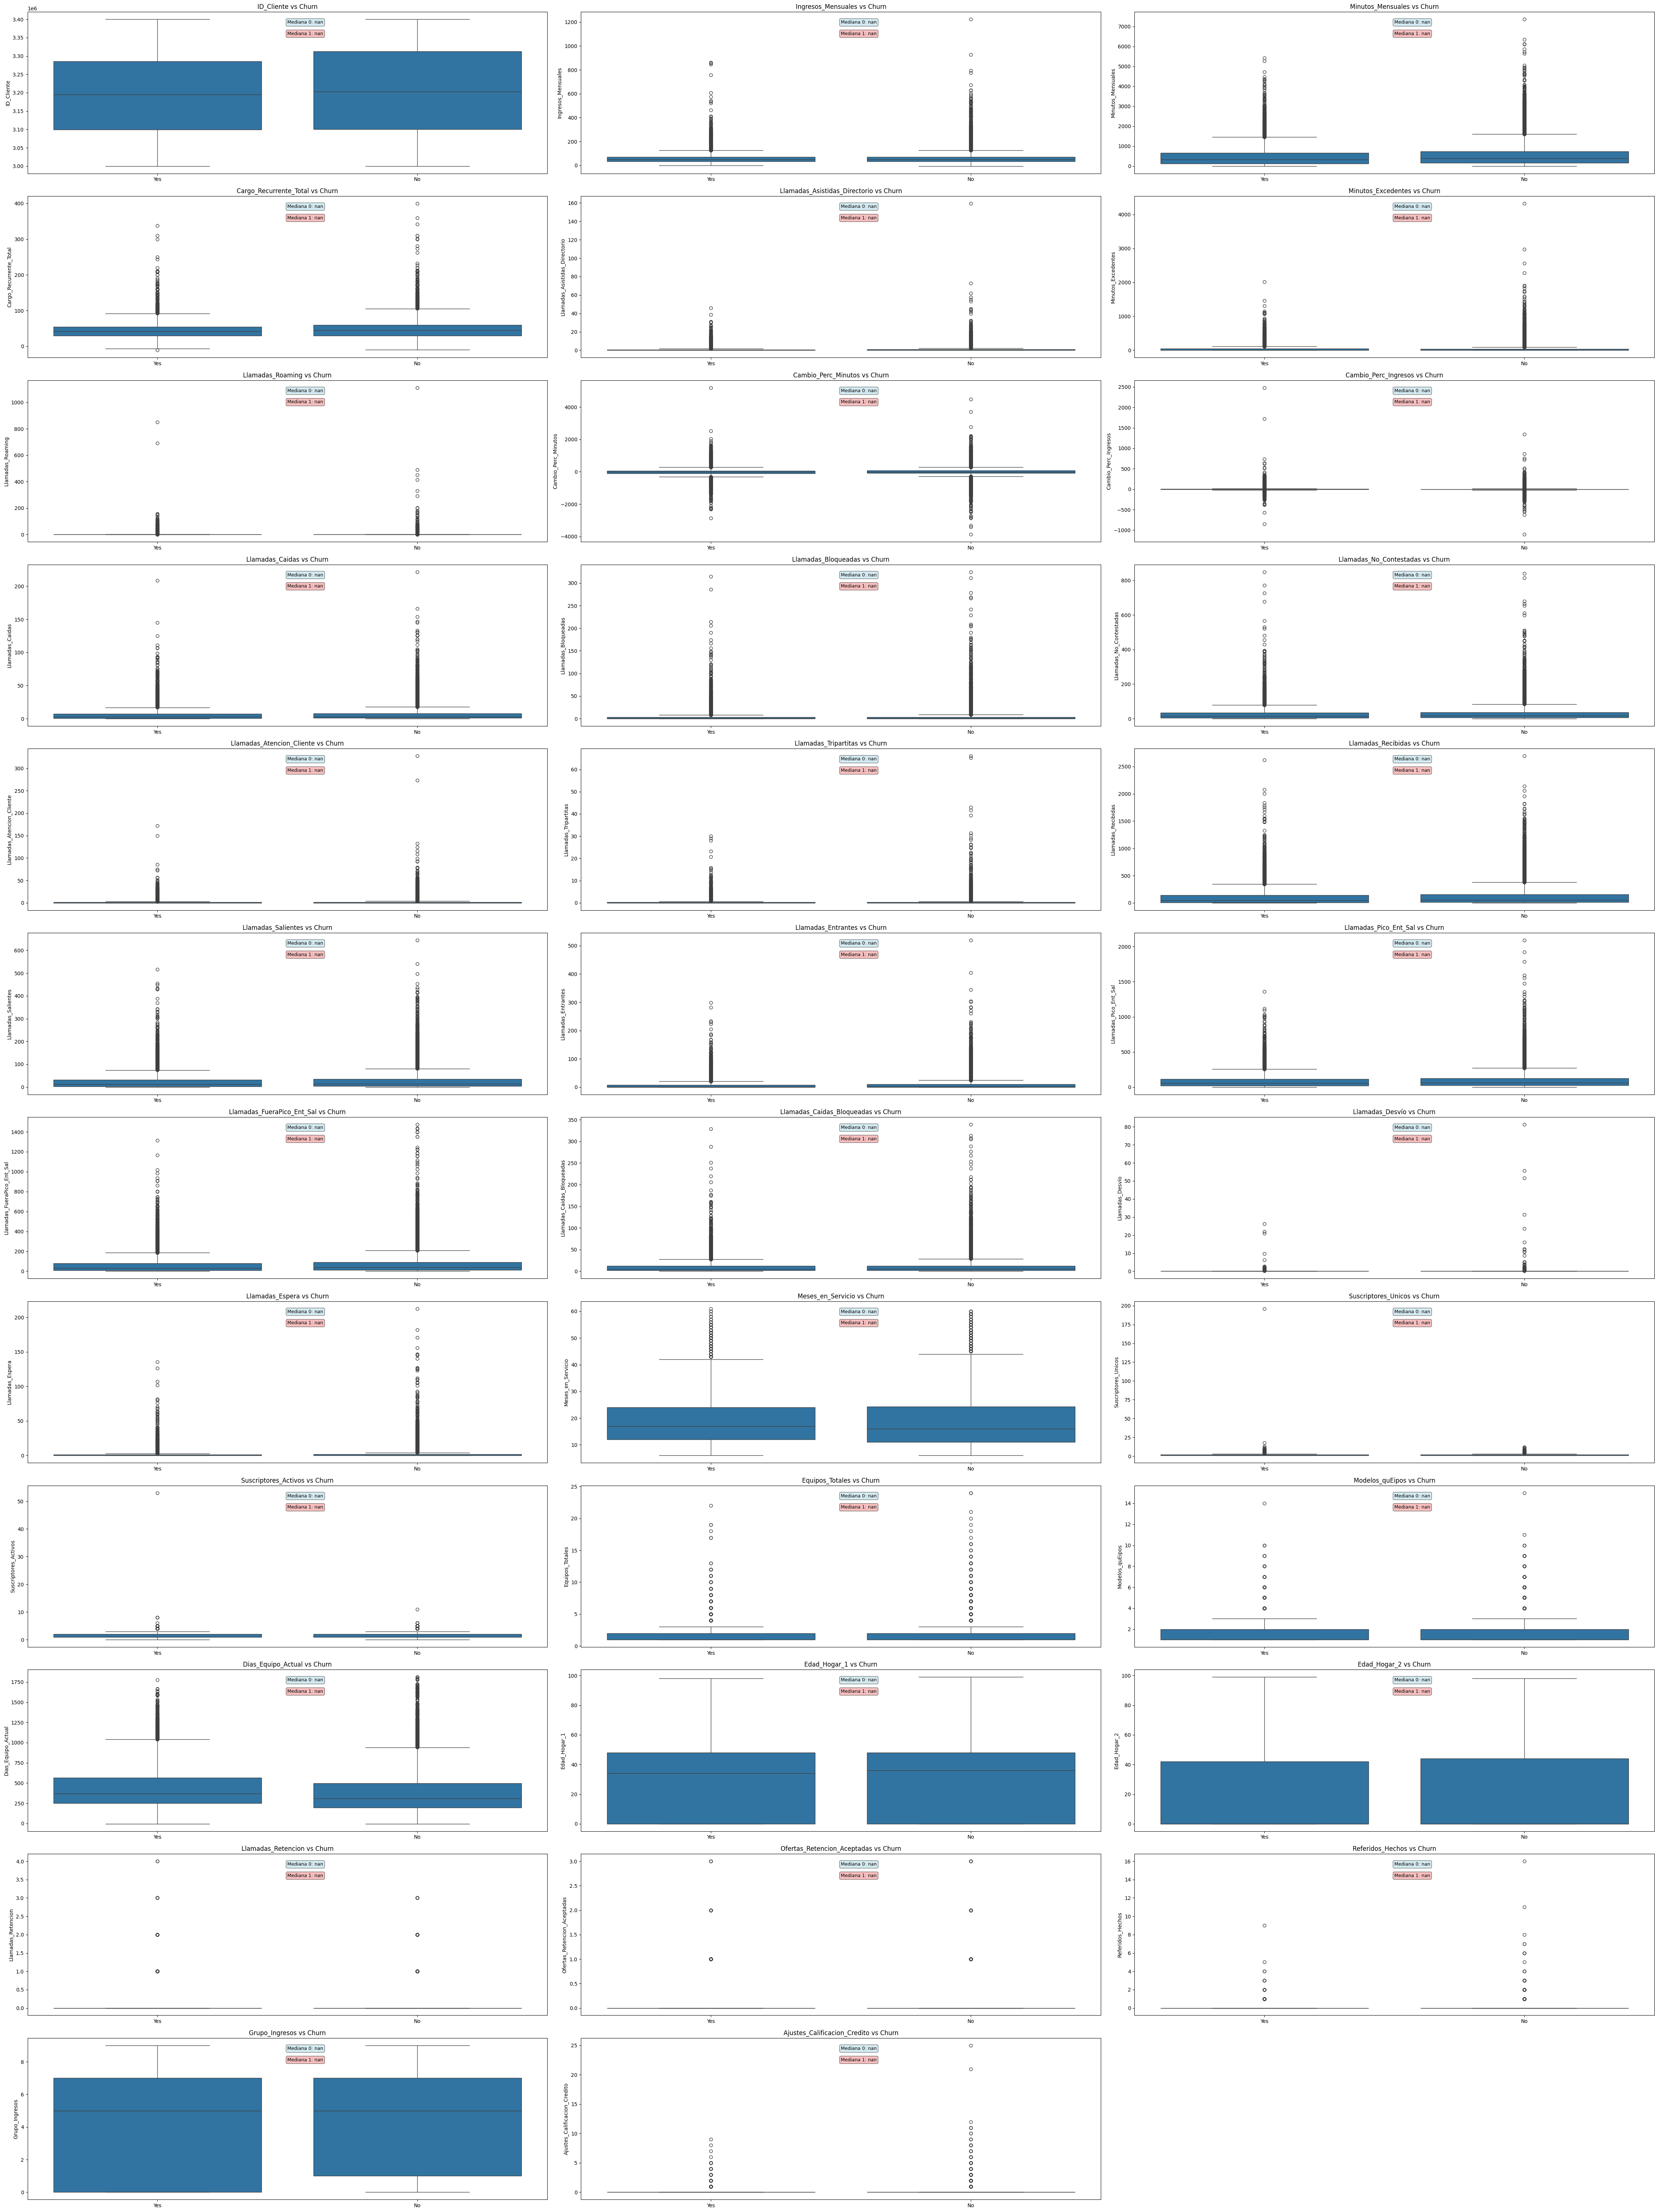

In [27]:
graficar_boxplots_por_churn(df3, 'Churn', variable_numericas)

-- Variables numéricas a pasar al segundo filtro (regresión lineal)

- Core (obligatorias):

- Meses_en_Servicio

- Cargo_Mensual

- Llamadas_a_Soporte (o suma de llamadas problemáticas)

--Opcionales (validar VIF):

- Cargo_Total

- Minutos_Excedentes

--Excluir inicialmente:

- Variables de conteo con alta dispersión y poca separación visual

- Variables casi constantes

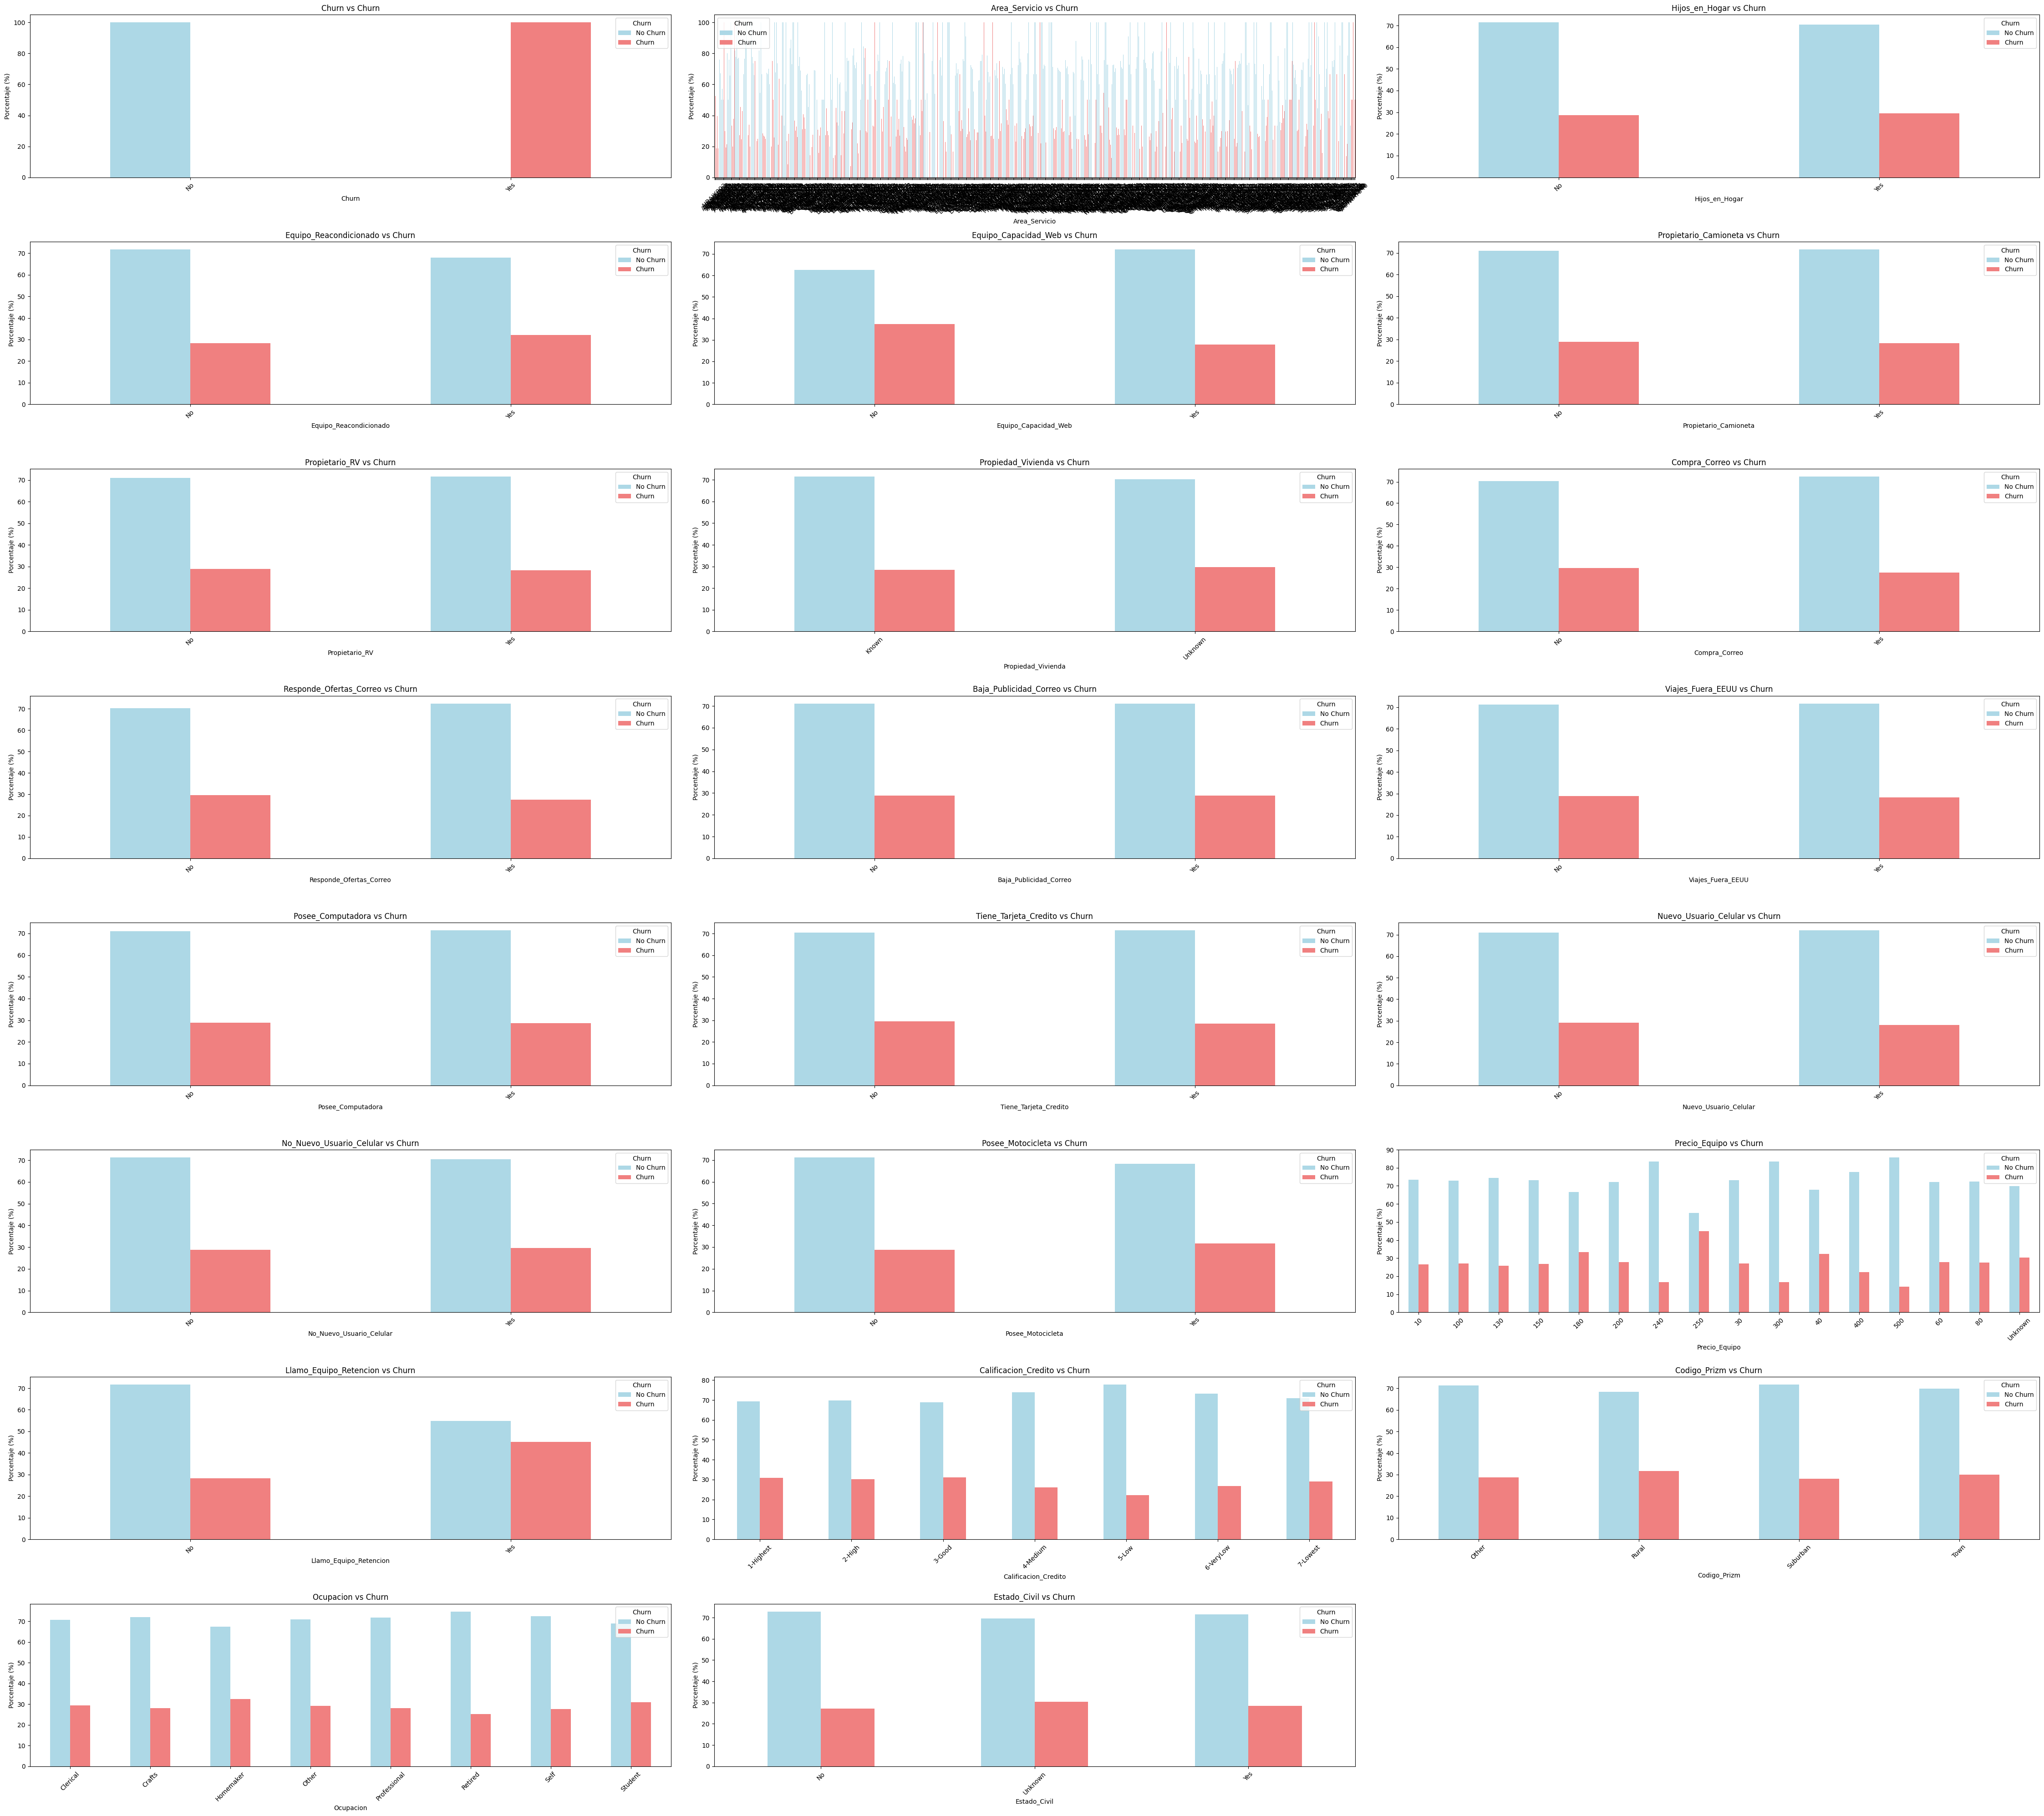

In [28]:
graficar_barras_por_churn(df3, 'Churn', Variable_categoricas)

--Variables categóricas a incluir como segundo filtro

- Obligatorias:

- Llama_Equipo_Retencion

- Equipo_Capacidad_Web

- Precio_Equipo

- Código_Plan

- Equipo_Reacondicionado

--Opcionales:

- Área_Servicio

- Estado_Civil

- Ocupación

- Calificación_Crédito

--Excluir inicialmente:

- Variables binarias con distribución casi idéntica entre clases

#Correlacion Lineal con respecto de las variables dependientes a la variable respuesta (CHURN)

Variables que corresponden o afecten a la variable de salida, en este apartado luego de la limpieza nos enfocaremos en el analisis de correlacion para el ML



1.   Aislar als variables que mayor correlacion tengan con la variable de salida(se pude utilizar IA o Graficas para que por criterio se evalua cuales tengan mayor relacion antes del modelo matematico de regresion, opcional)
2.   Elaboral el modelo de regresion para clasificar, detectar las variables que afecten a la variable respuesta
3. Aislar estar variables en otro dataset para usarlas en el modelado de ML en los entrenamientos respectivos.






#Modelado Predictivo

- Separacion de datos
  1. Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Se recomienda una divicion de 70% para entrenamiento y 30% para prueba o 80/20, dependiedno del tamaño de los datos o hacer la separacion en datos de entrenamiento, evaluacion y prueba

- Creación de Modelos
  1. Creacion de los modelos para la prediccion de los clientes estos pueden ser
          --KNN o Regresion Logistica
          -- Arbol de Decision o Random Forest

 (nota: recordar que algunos modelos requieren una normalizacion de los datos, para la prediccion podemos combinar ambos modelos con normalizacion o sin normalizacion, depende esto de las variables de los datos )

#Evaluacion del modelo

 Evaluación de los modelos de acuerdo a las métricas:
(aun por especificar)

Preguntas de evaluación
¿Cuál modelo tuvo el mejor desempeño?
¿Algún modelo presentó overfitting o underfitting?

# Serializacion del modelo

Serializar el modelo en el archivo adecuado para enviar al equipo de back end este archivo puede ser (json,pkl,etc)
esto es de acuerdo al modleo champion obtenido de la evaluacion asi como el requisito de compatibilidad para la api